In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [3]:
# Load your regression dataset
data = pd.read_csv('/content/Customer-Churn.csv')

In [24]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2.0,53.85,108.15,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   float64
 1   tenure                                 7043 non-null   float64
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   float64
 5   gender_Male                            7043 non-null   float64
 6   Partner_Yes                            7043 non-null   float64
 7   Dependents_Yes                         7043 non-null   float64
 8   PhoneService_Yes                       7043 non-null   float64
 9   MultipleLines_No phone service         7043 non-null   float64
 10  MultipleLines_Yes                      7043 non-null   float64
 11  Inte

In [26]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.765853,0.265370,0.504756,0.483033,0.299588,0.903166,0.096834,...,0.216669,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880
std,0.368612,24.559481,30.090047,2266.762876,0.441561,0.500013,0.499748,0.458110,0.295752,0.295752,...,0.412004,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Data preprocessing (modify as per your dataset)
data = data.drop("customerID", axis=1)  # Drop customerID as it's not relevant for regression

In [5]:
# Handle non-numeric values in the 'TotalCharges' column
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")  # Convert TotalCharges to numeric

In [6]:
# Convert the target variable 'Churn' to binary (1 for 'Yes' and 0 for 'No')
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [7]:
# Encode specified categorical variables using one-hot encoding
categorical_cols = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [8]:
# Handle missing values with SimpleImputer (using 'most_frequent' strategy)
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [9]:
# Split the data into training and testing sets
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)
print(y_pred)

[0.71 0.18 0.02 ... 0.04 0.   0.42]


In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 0.14479682041005426
R-squared (R2) Score: 0.2561036559967371


In [20]:
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Initial Predicted Churn')

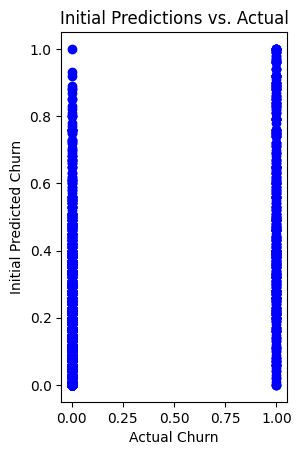

In [21]:
# Scatter plot of initial predictions vs. actual values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.title('Initial Predictions vs. Actual')
plt.xlabel('Actual Churn')
plt.ylabel('Initial Predicted Churn')


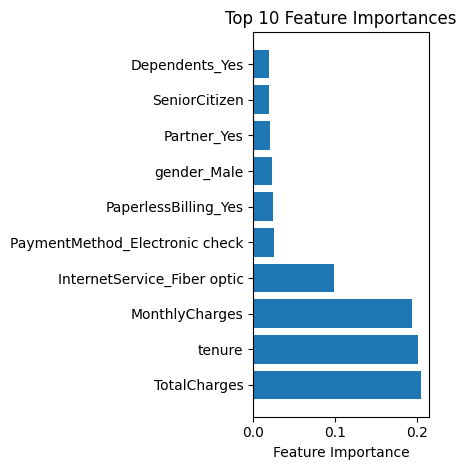

In [18]:
# Bar chart of feature importances (if you want to visualize feature importance)
plt.subplot(1, 2, 2)
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
top_features = X_train.columns[sorted_idx][:10]  # Display the top 10 features
plt.barh(top_features, feature_importance[sorted_idx][:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature Importance')


In [22]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

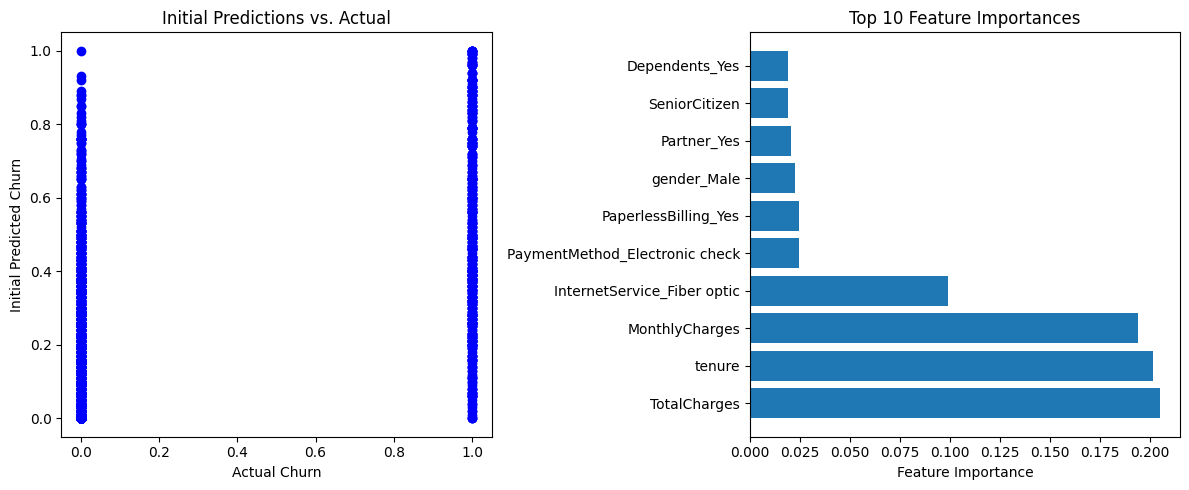